In [65]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [26]:
train_data = keras.utils.image_dataset_from_directory(
    directory='images/train',
    labels='inferred',
    label_mode='int',
    batch_size = 10,
    image_size=(256,256)
)
test_data = keras.utils.image_dataset_from_directory(
    directory='images/val',
    labels='inferred',
    label_mode='int',
    batch_size = 10,
    image_size=(256,256)
)

Found 192 files belonging to 2 classes.
Found 30 files belonging to 2 classes.


In [27]:
def normalize(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

In [106]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 32, 32, 128)     

In [108]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
20/20 [==============================] - 11s 496ms/step - loss: 1.0292 - accuracy: 0.5625 - val_loss: 0.7406 - val_accuracy: 0.6667
Epoch 2/5
20/20 [==============================] - 10s 485ms/step - loss: 0.7854 - accuracy: 0.4583 - val_loss: 0.6318 - val_accuracy: 0.6667
Epoch 3/5
20/20 [==============================] - 10s 487ms/step - loss: 0.6205 - accuracy: 0.6146 - val_loss: 0.4855 - val_accuracy: 0.7667
Epoch 4/5
20/20 [==============================] - 10s 477ms/step - loss: 0.5652 - accuracy: 0.7031 - val_loss: 0.6208 - val_accuracy: 0.6000
Epoch 5/5
20/20 [==============================] - 10s 483ms/step - loss: 0.4373 - accuracy: 0.8125 - val_loss: 0.6334 - val_accuracy: 0.6667


In [97]:
import cv2
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 107ms/step


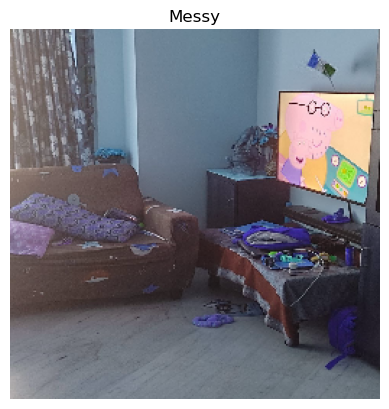

In [99]:
path = 'images/test/room.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.axis('off')
img = img.reshape((1,256,256,3))
pred = "Clean" if model.predict(img)[0] == 0 else "Messy"
plt.title(pred)
plt.show()

1/1 [==============================] - 0s 31ms/step


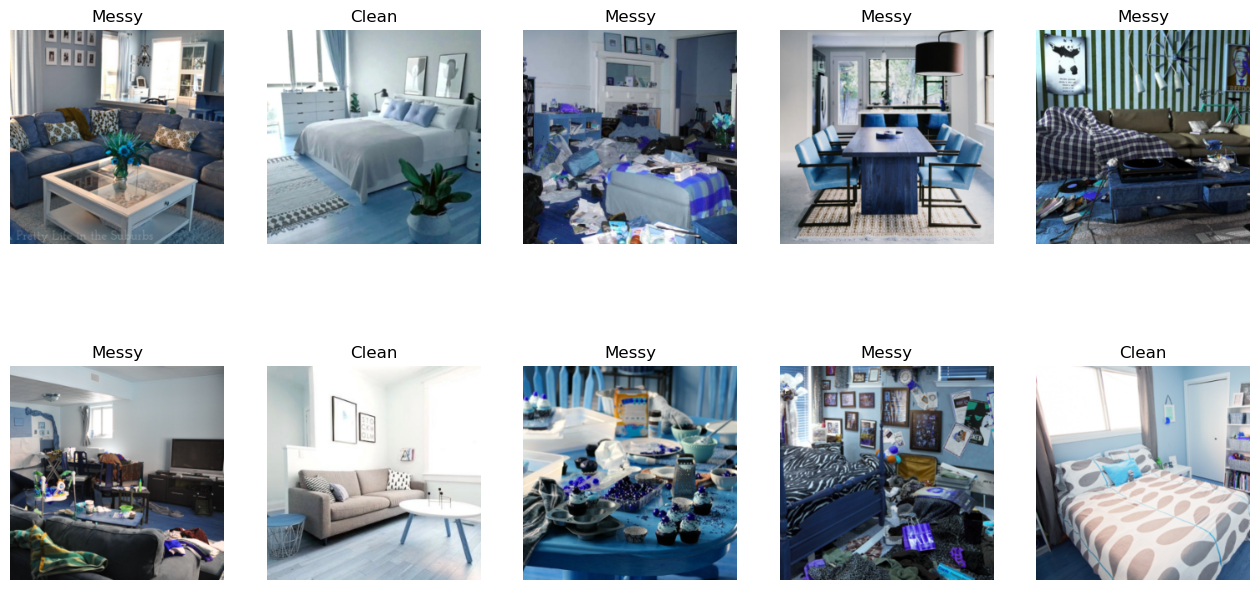

In [110]:
fig,axes = plt.subplots(2,5,figsize=(16,8))
k=0

for i in range(2):
    for j in range(5):
        path = f'images/test/{k}.png'
        k+=1
        img = cv2.imread(path)
        img = cv2.resize(img,(256,256))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
        img = img.reshape((1,256,256,3))
        pred = "Clean" if model.predict(img)[0] == 0 else "Messy"
        axes[i][j].set_title(pred)